<a href="https://colab.research.google.com/github/NSR9/Extensive-Vision-AI/blob/main/Assignment_10/Part_A/Assignment_10_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install the required libraries**

In [1]:
!pip install git+https://github.com/albumentations-team/albumentations.git

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-gmnn0357
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-gmnn0357
  Created wheel for albumentations: filename=albumentations-1.0.3-py3-none-any.whl size=98755 sha256=bd66f62e6413ac0400ca24ff451e366e815fee9ec2449b63eeaeba160cce5a1a
  Stored in directory: /tmp/pip-ephem-wheel-cache-d1z6sa1w/wheels/09/5b/e0/38cb85186b3cb979092395de69893163f9a223a72066123599
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-jpsywnox
Albumentation library is successfully installed!
fatal: destination path 'PyTNet' already exists and is not an empty directory.


## **Importing Required files**

In [ ]:
from __future__ import print_function
import os
from pprint import pprint

import torch
import torchvision
import albumentations as A
from torchvision import datasets

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

# Custom Libraries
from eva_pytorch_wrapper.models.resnet import ResNet18
from eva_pytorch_wrapper.utils.graph_utility import two_variable_plot, plot_accuracy_loss_curves, plot_misclassified_images
from eva_pytorch_wrapper.utils.misc import process_cnfig, get_data_loader_args, check_cuda_availability,\
    get_model_summary, load_optimizer, get_wrong_predictions, run_epochs
from eva_pytorch_wrapper.utils.data_utility import load_train_data, load_test_data, get_train_transformations, get_test_transformations

## **Load Data , spit and apply transforms**

In [ ]:
channel_means = (0.442,0.442,0.442)
channel_stdevs = (0.278, 0.278, 0.278)
train_transform = AlbumentationTransforms([       
                                                                
                                      A.HorizontalFlip(p = 0.7),
                                      A.PadIfNeeded(min_height=70, min_width=70, border_mode=4, value=None, mask_value=None, always_apply=False, p=1.0),
                                      A.RandomCrop(64, 64, always_apply=False, p=1.0),
                                      A.Rotate(limit=30, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),
                                      A.Normalize(mean=channel_means, std=channel_stdevs),
                                      A.Cutout(num_holes=1, max_h_size=32,max_w_size = 32,p=0.7) 
                                       ])
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])
train_dataset , test_dataset,classes = TinyImageNetDataSet(train_split = 70,test_transforms = test_transform,train_transforms = train_transform)

## **DataLoader**

In [ ]:
cuda = check_cuda_availability() # Check if cuda is available or not

data_loader_args = get_data_loader_args(cuda=cuda) # Get Data Loader Arguments

trainloader = load_train_data(
    train_data= train_set,
    **data_loader_args
) # Load Train Data

testloader = load_test_data(
    test_data= test_set,
    **data_loader_args
) # Load Test Data

device = torch.device("cuda" if cuda else "cpu")
trainset = TinyImageNet("./data/", train=True, download=True, transform=train_transforms)
testset = TinyImageNet("./data/", train=False, download=True, transform=test_transforms)

## **Print the summary**

In [ ]:
model = resnet.ResNet18()

get_model_summary(
    model= model,
    input_size= eval(config['input_size']['value'])
) # Get Model Summary


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

## **Initialise Optimiser,Scheduler, Criterion**

In [ ]:
optimizer = load_optimizer(
    model= model,
    learning_rate= config['learning_rate']['value'],
    momentum=config['momentum']['value'], 
    weight_decay=config['optimizer_weight_decay']['value']
) # load Optimizer

## **Train Model**

In [ ]:
CUDA_LAUNCH_BLOCKING=1
train_accuracy, train_losses, test_accuracy, test_losses = run_epochs(
    train_loader= train_loader, 
    test_loader= test_loader, 
    device= device, 
    model= model, 
    optimizer= optimizer, 
    train_epochs= config['train_epochs']['value'], 
    max_lr=config['max_lr']['value'],
    is_one_cycle_lr=False
) # Run Train and Test Loop

EPOCH: 1 LR: 0.002




Test set: Average loss: 0.0165, Accuracy: 3559/33000 (10.78%)

accuracy increased, Saving model....
EPOCH: 2 LR: 0.0038005982053838485




Test set: Average loss: 0.0157, Accuracy: 4357/33000 (13.20%)

accuracy increased, Saving model....
EPOCH: 3 LR: 0.005601196410767697




Test set: Average loss: 0.0159, Accuracy: 4791/33000 (14.52%)

accuracy increased, Saving model....
EPOCH: 4 LR: 0.007401794616151546




Test set: Average loss: 0.0138, Accuracy: 7418/33000 (22.48%)

accuracy increased, Saving model....
EPOCH: 5 LR: 0.009202392821535395




Test set: Average loss: 0.0126, Accuracy: 8986/33000 (27.23%)

accuracy increased, Saving model....
EPOCH: 6 LR: 0.011002991026919245




Test set: Average loss: 0.0128, Accuracy: 8748/33000 (26.51%)

EPOCH: 7 LR: 0.012803589232303092




Test set: Average loss: 0.0131, Accuracy: 8951/33000 (27.12%)

EPOCH: 8 LR: 0.01460418743768694




Test set: Average loss: 0.0118, Accuracy: 10530/33000 (31.91%)

accuracy increased, Saving model....
EPOCH: 9 LR: 0.01640478564307079




Test set: Average loss: 0.0109, Accuracy: 11477/33000 (34.78%)

accuracy increased, Saving model....
EPOCH: 10 LR: 0.01820538384845464




Test set: Average loss: 0.0111, Accuracy: 11711/33000 (35.49%)

accuracy increased, Saving model....
EPOCH: 11 LR: 0.01999671096345515




Test set: Average loss: 0.0108, Accuracy: 12248/33000 (37.12%)

accuracy increased, Saving model....
EPOCH: 12 LR: 0.01900671096345515




Test set: Average loss: 0.0100, Accuracy: 12888/33000 (39.05%)

accuracy increased, Saving model....
EPOCH: 13 LR: 0.01801671096345515




Test set: Average loss: 0.0100, Accuracy: 13291/33000 (40.28%)

accuracy increased, Saving model....
EPOCH: 14 LR: 0.01702671096345515




Test set: Average loss: 0.0096, Accuracy: 13895/33000 (42.11%)

accuracy increased, Saving model....
EPOCH: 15 LR: 0.01603671096345515




Test set: Average loss: 0.0094, Accuracy: 14291/33000 (43.31%)

accuracy increased, Saving model....
EPOCH: 16 LR: 0.01504671096345515




Test set: Average loss: 0.0089, Accuracy: 15203/33000 (46.07%)

accuracy increased, Saving model....
EPOCH: 17 LR: 0.014056710963455149




Test set: Average loss: 0.0092, Accuracy: 14670/33000 (44.45%)

EPOCH: 18 LR: 0.01306671096345515




Test set: Average loss: 0.0093, Accuracy: 14536/33000 (44.05%)

EPOCH: 19 LR: 0.012076710963455148




Test set: Average loss: 0.0087, Accuracy: 15615/33000 (47.32%)

accuracy increased, Saving model....
EPOCH: 20 LR: 0.011086710963455149




Test set: Average loss: 0.0090, Accuracy: 15365/33000 (46.56%)

EPOCH: 21 LR: 0.010096710963455147




Test set: Average loss: 0.0082, Accuracy: 16685/33000 (50.56%)

accuracy increased, Saving model....
EPOCH: 22 LR: 0.00910671096345515




Test set: Average loss: 0.0084, Accuracy: 16219/33000 (49.15%)

EPOCH: 23 LR: 0.008116710963455148




Test set: Average loss: 0.0079, Accuracy: 17155/33000 (51.98%)

accuracy increased, Saving model....
EPOCH: 24 LR: 0.00712671096345515




Test set: Average loss: 0.0079, Accuracy: 17087/33000 (51.78%)

EPOCH: 25 LR: 0.006136710963455149




Test set: Average loss: 0.0076, Accuracy: 17390/33000 (52.70%)

accuracy increased, Saving model....
EPOCH: 26 LR: 0.005146710963455148




Test set: Average loss: 0.0076, Accuracy: 17740/33000 (53.76%)

accuracy increased, Saving model....
EPOCH: 27 LR: 0.00415671096345515




Test set: Average loss: 0.0076, Accuracy: 17892/33000 (54.22%)

accuracy increased, Saving model....
EPOCH: 28 LR: 0.0031667109634551487




Test set: Average loss: 0.0073, Accuracy: 18406/33000 (55.78%)

accuracy increased, Saving model....
EPOCH: 29 LR: 0.002176710963455151




Test set: Average loss: 0.0071, Accuracy: 18791/33000 (56.94%)

accuracy increased, Saving model....
EPOCH: 30 LR: 0.0011867109634551495




Test set: Average loss: 0.0069, Accuracy: 19037/33000 (57.69%)

accuracy increased, Saving model....


In [ ]:
Lr = train_test.LR

## **PLot LR Curve**

No handles with labels found to put in legend.


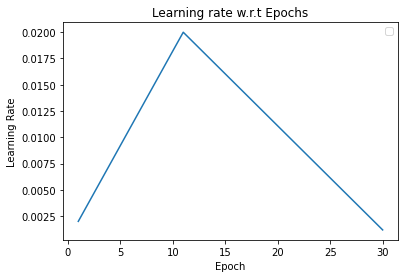

In [ ]:
import numpy as np
curves = [{"x":np.arange(1,31), "y": Lr, "label": "","xlabel": "Epoch", "ylabel":"Learning Rate"}]
evaluate.plot_curve(curves,"Learning rate w.r.t Epochs",Figsize = (6,4))

## **Accuracy Curve**

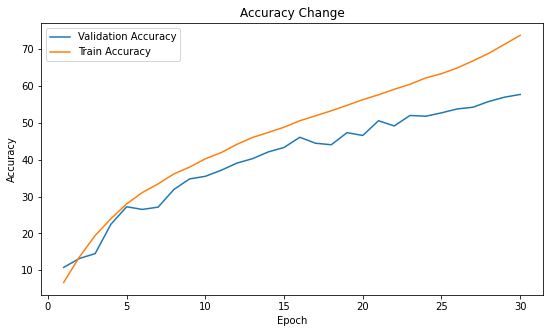

In [ ]:

curves = [{"x":np.arange(1,31),"y":train_test.test_acc , "label": "Validation Accuracy","xlabel": "Epoch", "ylabel":"Accuracy" },
          {"x":np.arange(1,31),"y":train_test.train_acc , "label": "Train Accuracy","xlabel": "Epoch", "ylabel":"Accuracy" },
]
evaluate.plot_curve(curves,"Accuracy Change",Figsize = (9,5))